In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm 
from statsmodels.formula.api import logit, probit, poisson, ols

# PART 1: MULTIPLE LINEAR REGRESSION

## Step 1: Identifying the Business Source

What are the demohraphic and professional characteristics that increase a worker's salary?

## Step 2: Sourcing the data

In [2]:
df = pd.read_csv("hr.csv")
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,01/07/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,01/02/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


## Step 3: EDA

In [3]:
# Get insights into dataset structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non


    This dataset has 35 columns and 311 records with almost no null values. Only the columns DateofTermination and ManagerID have null values. Aside from that:
        - All columns containing some type of ID are coded as integer or floating, but they should be coded as string for ease of analysis. 
        - The LastPerformanceReview_Date column is coded as a string, but I will recode it as a date for analysis
        - The State column is very useful for analytics, but recoding it as region would be more helpful
        - The DOB column could be insightful. I will recode this column as age.
    

In [4]:
# What states are present in this dataset?

df['State'].unique()

array(['MA', 'TX', 'CT', 'VA', 'VT', 'AL', 'WA', 'CA', 'OH', 'IN', 'TN',
       'NH', 'RI', 'PA', 'CO', 'NY', 'UT', 'GA', 'FL', 'NC', 'KY', 'ID',
       'NV', 'MT', 'OR', 'ND', 'AZ', 'ME'], dtype=object)

In [5]:
# Recoding state into regions 

df1 = df.replace({'State' : {'CT' : 'Northeast', 'ME' : 'Northeast', 'MA' : 'Northeast', 'NH' : 'Northeast', 'RI' : 'Northeast', 'NJ' : 'Northeast', 'NY' : 'Northeast', 'PA' : 'Northeast',
                             'VT' : 'Northeast',
                              'IL' : 'Midwest', 'IN' : 'Midwest', 'MI' : 'Midwest', 'OH' : 'Midwest', 'WI' : 'Midwest', 'IA' : 'Midwest', 'KS' : 'Midwest', 'MN' : 'Midwest', 'MO' : 'Midwest',
                              'NE' : 'Midwest', 'ND' : 'Midwest', 'SD' : 'Midwest',
                              'DE' : 'South', 'FL' : 'South', 'GA' : 'South', 'MD' : 'South', 'NC' : 'South', 'SC' : 'South', 'VA' : 'South', 'WA' : 'South', 'WV' : 'South',
                              'AL' : 'South', 'KY' : 'South', 'MS' : 'South', 'TN' : 'South', 'AR' : 'South', 'LA' : 'South', 'OK' : 'South', 'TX' : 'South',
                              'AZ' : 'West', 'CO' : 'West', 'ID' : 'West', 'MT' : 'West', 'NV' : 'West', 'NM' : 'West', 'UT' : 'West', 'WY' : 'West', 'AK' : 'West', 'CA' : 'West',
                              'HI' : 'West', 'OR' : 'West', 'WA' : 'West'}})
                              
# Rename column to Region
df1 = df1.rename(columns={"State" : "Region"})

# Check if change was effective 

df1.iloc[0:5, 11:16]

,PositionID,Position,Region,Zip,DOB
0,19,Production Technician I,Northeast,1960,07/10/1983
1,27,Sr. DBA,Northeast,2148,05/05/1975
2,20,Production Technician II,Northeast,1810,09/19/88
3,19,Production Technician I,Northeast,1886,09/27/88
4,19,Production Technician I,Northeast,2169,09/08/1989


In [6]:
# Creating column for Age 

df1['Age'] = (2024) - pd.DatetimeIndex(df1['DOB']).year
df1.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,41
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,49
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,36
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15,36
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2,35


In [7]:
# Checking unique values for HispanicLatino column

df1['HispanicLatino'].unique()

array(['No', 'Yes', 'no', 'yes'], dtype=object)

In [8]:
# Recoding Hispanic Column

df1 = df1.replace({'HispanicLatino' : {'Yes' : 1, 'No' : 0, 'yes' : 1, 'no': 0}})
df1['HispanicLatino'].head()                               

0    0
1    0
2    0
3    0
4    0
Name: HispanicLatino, dtype: int64

In [9]:
# Get number of days since last performance review

# Change data type

import datetime
df1['LastPerformanceReview_Date'] = pd.to_datetime(df1['LastPerformanceReview_Date'])

# Assign variables for dates

today = np.datetime64('2021-04-21') # I chose this date as "today" because this is the last time the dataset was updated
ref_date = df1['LastPerformanceReview_Date']

# Create new column 
df1['days_since_review'] = ((today - ref_date) / np.timedelta64(1, 'D'))
df1['days_since_review'] = df1['days_since_review'].astype(int)

df1.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,days_since_review
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,41,825
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,49,1883
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,36,3263
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,36,839
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,35,1906


In [10]:
# See all colummns and check for correct data types
# This is done before deleting the unnecessary columns

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [11]:
# Drop all unnecessary columns
# The only columns I will need for analysis are :
    # MarriedID, GenderID, State, Age, HispanicLatino, Performance Score
    # EmpSatisfaction, SpecialProjectsCount, Days_Late_Last_30, Absences, days_since_review

# Assign in new variable

df2 = df1
df2 = df2.drop(df2.columns[[0,1,3,5,6,7,8,10,11,12,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,33]], axis=1) 
         
df2.head()

,MarriedID,GenderID,Salary,Region,HispanicLatino,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,days_since_review
0,0,1,62506,Northeast,0,Exceeds,5,0,0,1,41,825
1,1,1,104437,Northeast,0,Fully Meets,3,6,0,17,49,1883
2,1,0,64955,Northeast,0,Fully Meets,3,0,0,3,36,3263
3,1,0,64991,Northeast,0,Fully Meets,5,0,0,15,36,839
4,0,0,50825,Northeast,0,Fully Meets,4,0,0,2,35,1906


In [12]:
# Reorder columns
# The first three columns will be binary. Salary (the target variable) was moved towards the end

df2 = df2.iloc[:, [0,1,4,3,5,6,7,8,9,10,11,2]]
df2.head()

,MarriedID,GenderID,HispanicLatino,Region,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,days_since_review,Salary
0,0,1,0,Northeast,Exceeds,5,0,0,1,41,825,62506
1,1,1,0,Northeast,Fully Meets,3,6,0,17,49,1883,104437
2,1,0,0,Northeast,Fully Meets,3,0,0,3,36,3263,64955
3,1,0,0,Northeast,Fully Meets,5,0,0,15,36,839,64991
4,0,0,0,Northeast,Fully Meets,4,0,0,2,35,1906,50825


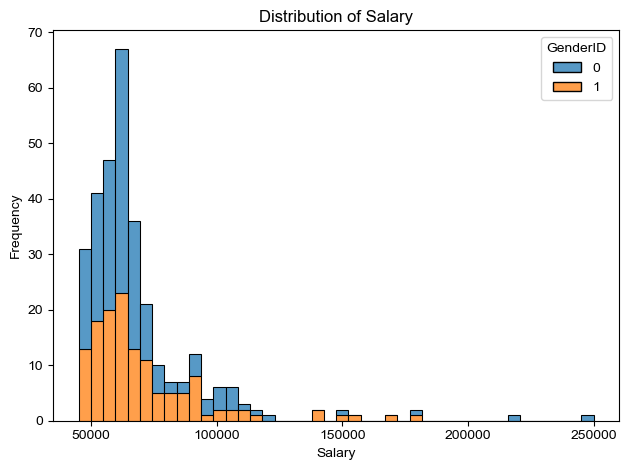

In [13]:
# Histogram of target variable

plt.subplot(1, 1, 1)
sns.histplot(data = df2, x="Salary", multiple="stack", hue = "GenderID")
sns.set_style("whitegrid", {'grid.color': 'black'})
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')

plt.tight_layout()
plt.show()


    In this graph we can observe that Salary is skewed as expected
    

Text(0.5, 1.0, 'Number of Employees per Region')

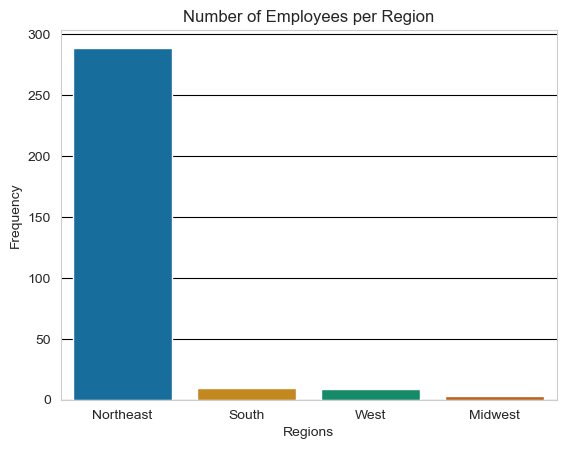

In [14]:
# Count of Employees per Region


fig = plt.figure()
ax = fig.add_subplot(111)
sns.countplot(data=df2, x="Region", palette="colorblind")
sns.set_style("whitegrid", {'grid.color': 'black'})
ax.set_xlabel('Regions')
ax.set_ylabel('Frequency')
ax.set_title('Number of Employees per Region')

Text(0.5, 1.0, 'Performance Score Among Employees')

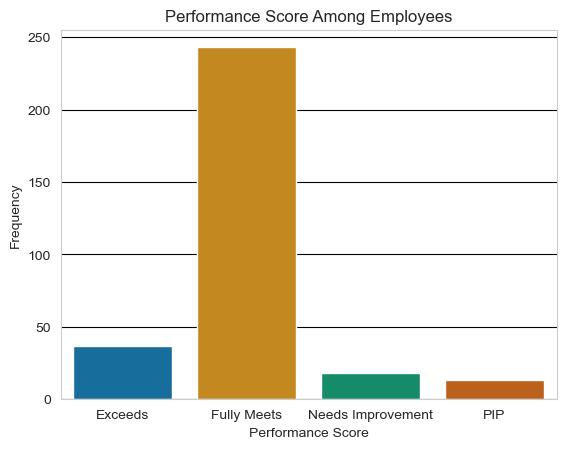

In [15]:
# Count of Performance Score

fig = plt.figure()
ax = fig.add_subplot(111)
sns.countplot(data=df2, x="PerformanceScore", palette="colorblind")
sns.set_style("whitegrid", {'grid.color': 'black'})
ax.set_xlabel('Performance Score')
ax.set_ylabel('Frequency')
ax.set_title('Performance Score Among Employees')

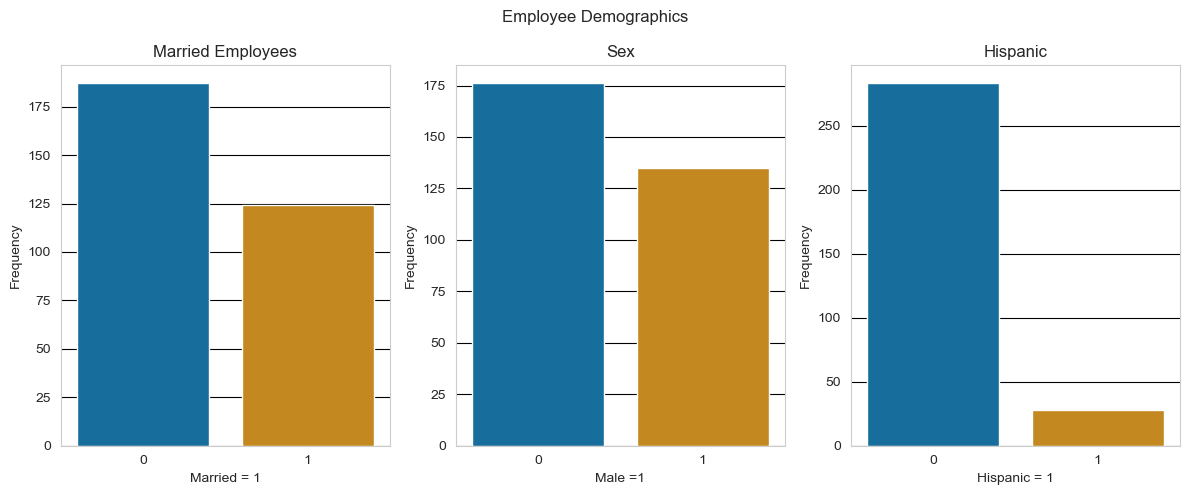

In [16]:
# Demographics 

plt.figure(figsize=(12,5))
plt.suptitle('Employee Demographics')

plt.subplot(1, 3, 1)
sns.countplot(data = df2, x="MarriedID", palette="colorblind")
sns.set_style("whitegrid", {'grid.color': 'black'})
plt.xlabel('Married = 1')
plt.ylabel('Frequency')
plt.title('Married Employees')

plt.subplot(1, 3, 2)
sns.countplot(data = df2, x="GenderID", palette="colorblind")
sns.set_style("whitegrid", {'grid.color': 'black'})
plt.xlabel('Male =1')
plt.ylabel('Frequency')
plt.title('Sex')

plt.subplot(1, 3, 3)
sns.countplot(data = df2, x="HispanicLatino", palette="colorblind")
sns.set_style("whitegrid", {'grid.color': 'gray'})
plt.xlabel('Hispanic = 1')
plt.ylabel('Frequency')
plt.title('Hispanic')

plt.tight_layout()
plt.show()

In [17]:
# Get descriptive stats of numerical variables
# Excluding binary variables

round(df2.iloc[:, 3:12].describe(), 2)

,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,days_since_review,Salary
count,311.00,311.00,311.00,311.00,311.00,311.00,311.00
mean,3.89,1.22,0.41,10.24,31.58,1318.11,69020.68
std,0.91,2.35,1.29,5.85,30.14,827.61,25156.64
min,1.00,0.00,0.00,1.00,-49.00,783.00,45046.00
25%,3.00,0.00,0.00,5.00,36.00,807.00,55501.50
50%,4.00,0.00,0.00,10.00,41.00,826.00,62810.00
75%,5.00,0.00,0.00,15.00,46.00,1858.50,72036.00
max,5.00,8.00,6.00,20.00,73.00,3934.00,250000.00



    - The range of Employee Satisfaction is between 1 and 5, with a mean value of 3.89
    - The maximum amount of Special Projects that an employee has done is 8, and over 75% of all employees have never taken on a special project
    - The maximum number of days in which an employee was late in the last 30 days is 6, but 75% of the employees were not late
    - The range of absences is between 1 and 30 days, and the average number of absences is 10 days
    - The range of age is between -49 and 73. This is problematic since a person cannot have -49 years. I will further explore this issue below
    - The range of salary is between $45,046 and $250,000. This column has a high standard deviation, meaning that it is highly skewed
    

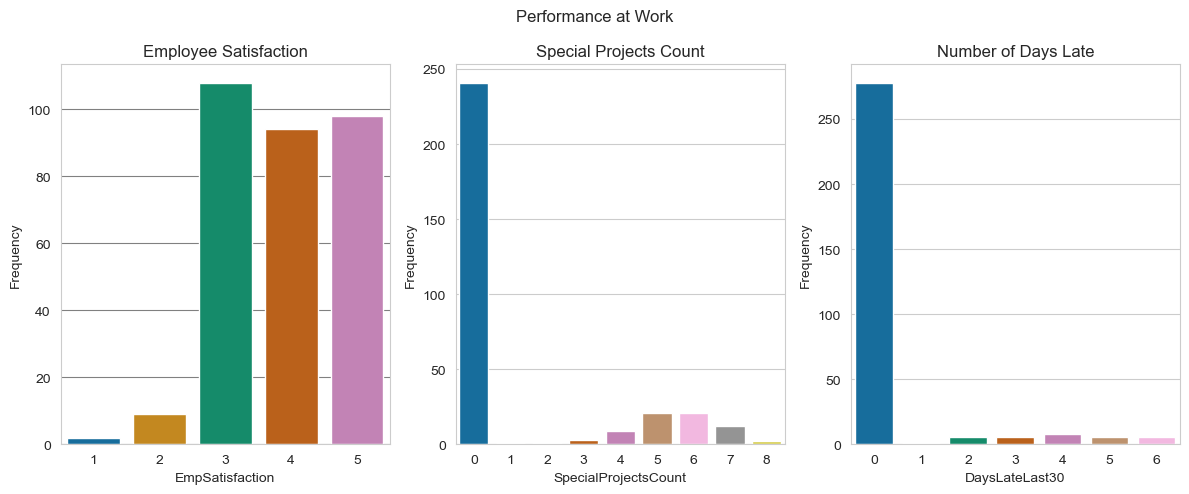

In [18]:
# Performance

plt.figure(figsize=(12,5))
plt.suptitle('Performance at Work')

plt.subplot(1, 3, 1)
sns.countplot(data = df2, x="EmpSatisfaction", palette="colorblind")
sns.set_style("whitegrid")
#plt.xlabel('Married = 1')
plt.ylabel('Frequency')
plt.title('Employee Satisfaction')

plt.subplot(1, 3, 2)
sns.countplot(data = df2, x="SpecialProjectsCount", palette="colorblind")
sns.set_style("whitegrid")
#plt.xlabel('Male =1')
plt.ylabel('Frequency')
plt.title('Special Projects Count')

plt.subplot(1, 3, 3)
sns.countplot(data = df2, x="DaysLateLast30", palette="colorblind")
sns.set_style("whitegrid")
#plt.xlabel('Male =1')
plt.ylabel('Frequency')
plt.title('Number of Days Late')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Salary by Sex. Male = 1')

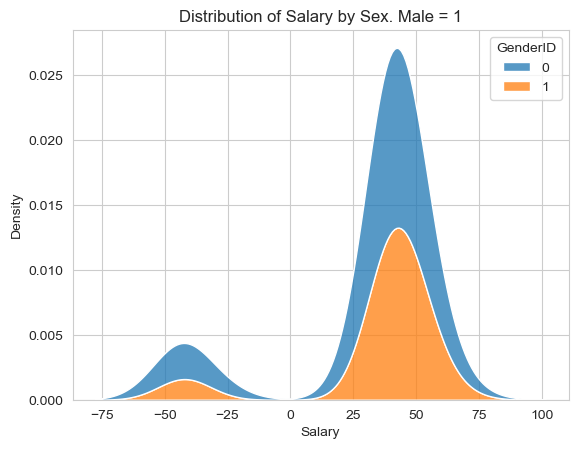

In [19]:
# Distribution of age

plt.subplot(1, 1, 1)
sns.kdeplot(data = df2, x="Age", multiple="stack", hue = "GenderID")
sns.set_style("white")
plt.xlabel('Salary')
#plt.ylabel('Frequency')
plt.title('Distribution of Salary by Sex. Male = 1')


    As expected, there are negative values within the age of the employees. I will now analyze how many records have negative age
    

In [20]:
# Gain insights on records with negative age

# Create variable for records where Age <= 18
age_negative = df2.loc[df2['Age'] <= 18]
age_negative.head()

,MarriedID,GenderID,HispanicLatino,Region,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,days_since_review,Salary
16,1,0,0,Northeast,Exceeds,3,0,0,16,-42,828,70131
17,0,0,0,Northeast,Fully Meets,5,0,0,12,-46,828,59026
20,0,1,1,Northeast,Fully Meets,3,0,0,13,-46,828,51044
21,0,0,0,Northeast,Fully Meets,3,0,0,2,-34,832,64919
24,0,0,0,Northeast,Fully Meets,5,0,0,5,-43,2605,57815


In [21]:
# Get number of records where Age <= 18

age_negative['Age'].count()

43


    A total of 43 out of 311 records have negative values for age, which is 13.8% of the data. Since it is a relatively large percentage of the data, taking into account we only have 311 records, I will not drop these data points. Instead, I will create 2 dataframes;
    
        - 1 dataframe called "df2" where all records are kept intact, including those with negative age
        - 1 dataframe called "df_page" where I dropped the records with negative age
        
    My goal is to run the models with the two dataframes to see if there is a difference.
    

In [22]:
# Create dataframe where we delete the negative age values

df_page = df2.drop(df2[df2.Age < 18].index)
round(df_page['Age'].describe(), 2)

count    268.00
mean      43.29
std        7.22
min       32.00
25%       38.00
50%       42.00
75%       47.00
max       73.00
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Age by Sex. Male = 1')

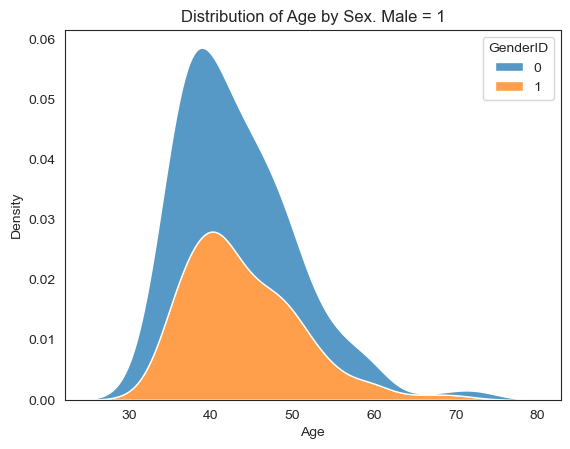

In [23]:
# Distribution of age - only positive values

plt.subplot(1, 1, 1)
sns.kdeplot(data = df_page, x="Age", multiple="stack", hue = "GenderID")
sns.set_style("white")
plt.xlabel('Age')
#plt.ylabel('Frequency')
plt.title('Distribution of Age by Sex. Male = 1')


    This kdeplot shows the distribution of age without negative values by sex. MThe average age amongst employees is 43.29. The range is from 32 to 73
    

Text(0.5, 1.0, 'Number of Days Absent')

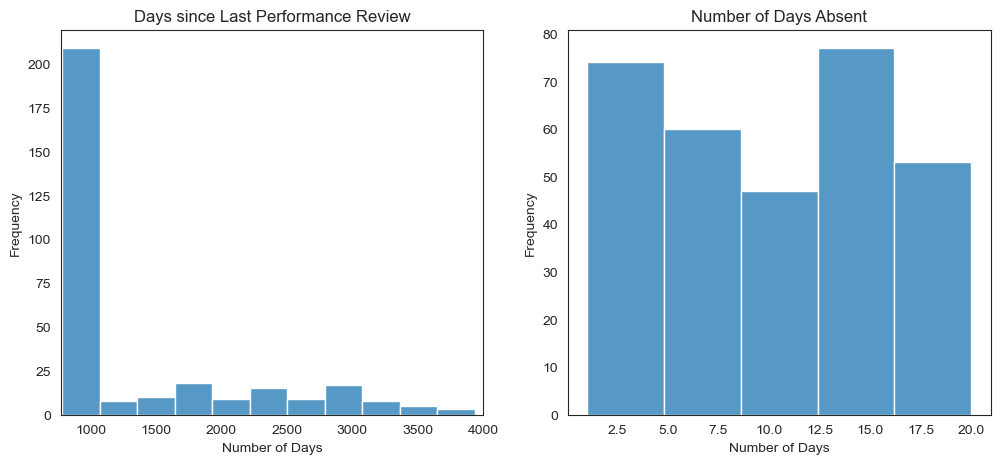

In [24]:
# Visualize number of days since last performance review

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(data = df2, x="days_since_review")
sns.set_style("white")
plt.xlim(770, 4000)
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.title('Days since Last Performance Review')

plt.subplot(1, 2, 2)
sns.histplot(data = df2, x="Absences", bins=5)
sns.set_style("whitegrid", {'grid.color': 'white'})
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.title('Number of Days Absent')

In [25]:
# Get correlation

numeric_columns = df2.select_dtypes(include=[np.number])
corr = round(numeric_columns.corr(), 2)
corr

,MarriedID,GenderID,HispanicLatino,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,days_since_review,Salary
MarriedID,1.00,-0.02,-0.07,-0.13,0.06,0.00,0.10,0.11,0.13,0.03
GenderID,-0.02,1.00,0.02,-0.04,0.09,0.08,-0.00,0.12,-0.06,0.06
HispanicLatino,-0.07,0.02,1.00,-0.02,0.04,-0.05,0.10,-0.06,-0.02,0.07
EmpSatisfaction,-0.13,-0.04,-0.02,1.00,0.03,-0.24,0.08,0.04,0.01,0.06
SpecialProjectsCount,0.06,0.09,0.04,0.03,1.00,-0.09,-0.02,-0.02,-0.16,0.51
DaysLateLast30,0.00,0.08,-0.05,-0.24,-0.09,1.00,0.00,0.03,0.07,-0.07
Absences,0.10,-0.00,0.10,0.08,-0.02,0.00,1.00,-0.00,0.10,0.08
Age,0.11,0.12,-0.06,0.04,-0.02,0.03,-0.00,1.00,0.03,-0.10
days_since_review,0.13,-0.06,-0.02,0.01,-0.16,0.07,0.10,0.03,1.00,-0.08
Salary,0.03,0.06,0.07,0.06,0.51,-0.07,0.08,-0.10,-0.08,1.00


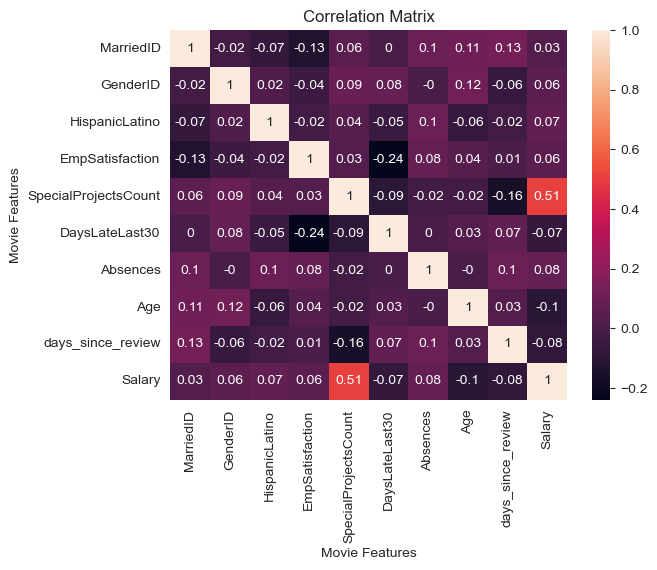

In [26]:
# Get correlation matrix
sns.heatmap(corr, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.tight_layout
plt.show()


    Most of the variables have low correlations. Special Projects Count has a correlation on 0.51 with Salary, which is considered medium correlation
    

## Step 4: Preparing the data

In [27]:
from sklearn.model_selection import train_test_split 
from statsmodels.compat import lzip

In [28]:
# Defining predictor and Target variables

# Categorical Columns
cat_col = ['Region', 'PerformanceScore']

#Predictors
X = pd.get_dummies(df2.drop(["Salary"], axis=1), columns=cat_col, drop_first=True)

# Create constant (y-intercept) for the model
X = sm.add_constant(X)

# Target
y = df[["Salary"]]


# splitting the data into training/test sets
# why do we do this?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)


# Ensure data is the correct shape 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(233, 16) (233, 1)
(78, 16) (78, 1)


## Step 5: Analyzing the data

### Model 0: Using all 311 records

In [29]:
# Create the model on training data
model = sm.OLS(y_train, X_train)

# Fit the model
model_results = model.fit()
model_results.params

const                                 60909.616145
MarriedID                              -435.971899
GenderID                                965.470437
HispanicLatino                         4942.082277
EmpSatisfaction                         375.957417
SpecialProjectsCount                   5409.100683
DaysLateLast30                        -1545.039288
Absences                                538.035810
Age                                    -119.560066
days_since_review                         0.814235
Region_Northeast                       5716.501232
Region_South                          13500.551825
Region_West                            8371.981659
PerformanceScore_Fully Meets         -10410.323725
PerformanceScore_Needs Improvement      417.183862
PerformanceScore_PIP                  -9666.518940
dtype: float64

In [30]:
# Get summary

# evaluate our model with cleaner output
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     5.833
Date:                Sun, 05 May 2024   Prob (F-statistic):           4.34e-10
Time:                        15:23:15   Log-Likelihood:                -2671.9
No. Observations:                 233   AIC:                             5376.
Df Residuals:                     217   BIC:                             5431.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               6.091e+04    1.9e+04      3.213      0.002    2.35e+04    9.83e+04
MarriedID                           -435.9719   3380.610     -0.129      0.898   -7099.006    6227.062
GenderID                             965.4704   3239.905      0.298      0.766   -5420.240    7351.181
HispanicLatino                      4942.0823   5694.881      0.868      0.386   -6282.280    1.62e+04
EmpSatisfaction                      375.9574   1984.152      0.189      0.850   -3534.719    4286.634
SpecialProjectsCount                5409.1007    672.186      8.047      0.000    4084.251    6733.951
DaysLateLast30                     -1545.0393   3243.455     -0.476      0.634   -7937.748    4847.670
Absences                             538.0358    281.501      1.911      0.057     -16.790    1092.861
Age                                 -119.5601     55.613     -2.150      0.033    -229.170      -9.950
days_since_review                      0.8142      2.067      0.394      0.694      -3.260       4.888
Region_Northeast                    5716.5012   1.74e+04      0.329      0.742   -2.85e+04    3.99e+04
Region_South                         1.35e+04   1.98e+04      0.682      0.496   -2.55e+04    5.25e+04
Region_West                         8371.9817   2.01e+04      0.416      0.678   -3.13e+04     4.8e+04
PerformanceScore_Fully Meets       -1.041e+04   4939.770     -2.107      0.036   -2.01e+04    -674.254
PerformanceScore_Needs Improvement   417.1839   1.45e+04      0.029      0.977   -2.81e+04     2.9e+04
PerformanceScore_PIP               -9666.5189   1.69e+04     -0.572      0.568   -4.29e+04    2.36e+04
==============================================================================
Omnibus:                      205.534   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4253.285
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                      22.803   Cond. No.                     3.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


    The R-Squared for the model is 28.7%, meaning that the current model only explains 28.7% of the variation in salary. The adjusted R-Square is even lower, and this makes sense ebcause the adjusted R-square penalizes for having insignificant variables in the model. Nine out of the 15 variables are not statistically significant at the 95% confidence level. The only statistically significant variables are HispanicLatino, Special Projects Count, Absences, Age, Region_South, and Performance Fully Meets.
    

In [31]:
### Model 1: Using records that have positive ages

# Defining predictor and Target variables

# Categorical Columns
cat_col = ['Region', 'PerformanceScore']

#Predictors
X1 = pd.get_dummies(df_page.drop(["Salary"], axis=1), columns=cat_col, drop_first=True)

# Create constant (y-intercept) for the model
X1 = sm.add_constant(X1)

# Target
y1 = df_page[["Salary"]]


# splitting the data into training/test sets
# why do we do this?
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 345)


# Ensure data is the correct shape 
print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(201, 16) (201, 1)
(67, 16) (67, 1)


In [32]:
# Create the model on training data
model1 = sm.OLS(y1_train, X1_train)

# Fit the model
model_results1 = model1.fit()
model_results1.params

const                                 54021.221995
MarriedID                             -3805.484442
GenderID                               3990.234502
HispanicLatino                        -4270.637072
EmpSatisfaction                        1592.774703
SpecialProjectsCount                   6042.751105
DaysLateLast30                        -1229.779643
Absences                                485.921931
Age                                     164.822674
days_since_review                         1.453670
Region_Northeast                        933.402641
Region_South                           5425.720665
Region_West                            4096.433711
PerformanceScore_Fully Meets         -17015.961976
PerformanceScore_Needs Improvement    -5187.872771
PerformanceScore_PIP                 -13686.296750
dtype: float64

In [33]:
# Get summary

# evaluate our model with cleaner output
model_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     9.484
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.48e-16
Time:                        15:23:15   Log-Likelihood:                -2247.4
No. Observations:                 201   AIC:                             4527.
Df Residuals:                     185   BIC:                             4580.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               5.402e+04   2.24e+04      2.415      0.017    9897.934    9.81e+04
MarriedID                          -3805.4844   2717.372     -1.400      0.163   -9166.505    1555.536
GenderID                            3990.2345   2602.412      1.533      0.127   -1143.985    9124.454
HispanicLatino                     -4270.6371   5179.453     -0.825      0.411   -1.45e+04    5947.749
EmpSatisfaction                     1592.7747   1533.127      1.039      0.300   -1431.886    4617.435
SpecialProjectsCount                6042.7511    581.567     10.390      0.000    4895.395    7190.107
DaysLateLast30                     -1229.7796   2551.144     -0.482      0.630   -6262.856    3803.296
Absences                             485.9219    233.791      2.078      0.039      24.683     947.161
Age                                  164.8227    185.080      0.891      0.374    -200.317     529.962
days_since_review                      1.4537      1.580      0.920      0.359      -1.663       4.570
Region_Northeast                     933.4026   1.84e+04      0.051      0.960   -3.54e+04    3.73e+04
Region_South                        5425.7207   1.93e+04      0.281      0.779   -3.27e+04    4.35e+04
Region_West                         4096.4337      2e+04      0.205      0.838   -3.53e+04    4.35e+04
PerformanceScore_Fully Meets       -1.702e+04   4392.893     -3.874      0.000   -2.57e+04   -8349.356
PerformanceScore_Needs Improvement -5187.8728   1.15e+04     -0.453      0.651   -2.78e+04    1.74e+04
PerformanceScore_PIP               -1.369e+04   1.41e+04     -0.968      0.334   -4.16e+04    1.42e+04
==============================================================================
Omnibus:                      117.126   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              981.835
Skew:                           2.084   Prob(JB):                    6.27e-214
Kurtosis:                      12.993   Cond. No.                     4.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


    The model significantly improved when using only only positive values for age. The R-squared increased to 45.5% and the adjusted R-Squared increased to 38.9%. This means that the current model explains 45.5% of the variation in Salary. Although this number is still low in the grand scheme of things, it is a significant improvement compared to Model 0.
    
    Additionally, more variables are now statistically significant. Ten out of the 15 variables are now statistically sitgnificant at the 95% confidence level, compared to the ont 5 significant variables from the previous model. Variables such as Gender, Married (y/n), and Employee Satisfaction are now significant.

    Since this model is an improvement from the original one, I will continue my analysis only using Model 1. 
    

In [34]:
# Obtain predictions of the data from Model 1

from sklearn.metrics import mean_squared_error, r2_score # For evaluating models
from sklearn import metrics # snagging the other metrics, including MAE, MSE, and RMSE.

y_pred = model_results1.predict(X1_test)

# let's take a look at our other metrics of model performance
print('MAE :', metrics.mean_absolute_error(y1_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y1_test, y_pred)))

MAE : 11421.56491830898
RMSE : 15952.436532016045


Text(0, 0.5, 'Predicted')

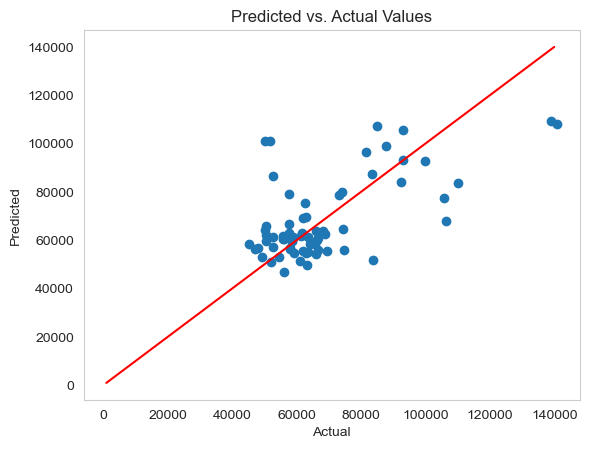

In [35]:
# Visualize the actual vs. predicted values

# Scatterplot
plt.scatter(y1_test, y_pred)

# Adding a line 
plt.plot([x for x in range(1000,140000)],[x for x in range(1000,140000)], color='red')

plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

### Step 6: Synthesizing Results

    
    I chose variables based on demographics and performance at work. The variables for demograpghics are Marries Status, Gender, Age, Region, and if they are hispanic or not. On the pther side, some of the performance-related variables are performance score, employee satisfaction, special projects count, days since last performance review, late arrivals in the last 30 days, and absences.
    
    Aside from region, all of the demographics variables showed to be important at predicting an employee's salary. Among the performance variables, all of them exce[t for late arrivals in the last 40 days, and performance needs improvement showed to ve important at predictinng an employee's salary.
    
    In terms of the model, both the Mean Absolute Error and the Root Mean Squared Error of the predictions are high. This means that the modeol generated a lot of errors when trying to predict the salary. In addiion, the standard deviation of its residuals is also high. Although disencouraging, these results make sense because the model can only predict about 45% of the variation in salary. In other words, this model is not good at predicting salary and it still produces a lot of errors. 
    
    This latest scatterplot also helps to see that the model wasn't able to accurately predict the salary, and it has significant variation. 
    

### Step 7: Insights and Recommendations


    In order to improve this model, I recommend:
    
        - Including more numerical variables such as years of experience and years of education. This is because education, among others, is usually a highly important factor when determining salary. 
        - Getting rid of the variable regions, since in this model it is not a good predictor of salary. 
        - Collecting more data, on as many employees as possible. The more records we have, the more accuarte the model will become. 
        - If possible, filling out the null values in the column Date of Termination. This column will allow us to calculate duration at the company in days, months, or years. It would be interesting to know if duration at the company has an important role when predicting salary. 
        
        
        

# PART 2: GLMs

## Step 1: Source the Data

In [36]:
# Read in dataset

df_2 = pd.read_csv("hr.csv")
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## Step 2: EDA

In [37]:
# Create Variable Age

df_2['Age'] = (2024) - pd.DatetimeIndex(df_2['DOB']).year
df_2.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,41
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,49
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,36
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15,36
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2,35


In [38]:
# Create column for days since last performance review

df_2['LastPerformanceReview_Date'] = pd.to_datetime(df_2['LastPerformanceReview_Date'])

# Assign variables for dates

today_2 = np.datetime64('2021-04-21') # I chose this date as "today" because this is the last time the dataset was updated
ref_date = df_2['LastPerformanceReview_Date']

# Create new column 
df_2['Days_Since_Review'] = ((today_2 - ref_date) / np.timedelta64(1, 'D'))
df_2['Days_Since_Review'] = df_2['Days_Since_Review'].astype(int)

df_2.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,Days_Since_Review
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,41,825
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,49,1883
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,36,3263
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,36,839
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,35,1906


In [39]:
# Create column for days in company

# Step 1: Convert columsn to date type
df_2['DateofHire'] = pd.to_datetime(df_2['DateofHire'])
df_2['DateofTermination'] = pd.to_datetime(df_2['DateofTermination'])

# Step 2: fill null values in Date of Termination with Today's Date
# Although not ideal, I am filling out the null values with "today's date" which is April 21st, 2021
# I chose this date because it's the last time the dataset was updated

df_2["DateofTermination"].fillna(np.datetime64('2021-04-21'), inplace = True)

# Step 3: Get number of months worked

import datetime
df_2['Days_Employed'] = ((df_2.DateofTermination - df_2.DateofHire) / np.timedelta64(1, 'D'))
df_2['Days_Employed'] = df_2['Days_Employed'].astype(int)

df_2.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,Days_Since_Review,Days_Employed
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.60,5,0,2019-01-17,0,1,41,825,3578
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.96,3,6,2016-02-24,0,17,49,1883,444
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.02,3,0,2012-05-15,0,3,36,3263,447
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Fully Meets,4.84,5,0,2019-01-03,0,15,36,839,4853
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Fully Meets,5.00,4,0,2016-02-01,0,2,35,1906,1884


In [40]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [41]:
# Drop unwanted columns

df4 = df_2
df4 = df4.drop(df4.columns[[0,1,3,5,6,7,8,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,30,33]], axis=1)        
df4.head()

,MarriedID,GenderID,Salary,RaceDesc,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Days_Since_Review,Days_Employed
0,0,1,62506,White,Exceeds,5,0,0,1,41,825,3578
1,1,1,104437,White,Fully Meets,3,6,0,17,49,1883,444
2,1,0,64955,White,Fully Meets,3,0,0,3,36,3263,447
3,1,0,64991,White,Fully Meets,5,0,0,15,36,839,4853
4,0,0,50825,White,Fully Meets,4,0,0,2,35,1906,1884


In [42]:
# Descriptive Stats

round(df4.describe(), 2)

,MarriedID,GenderID,Salary,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Days_Since_Review,Days_Employed
count,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00
mean,0.40,0.43,69020.68,3.89,1.22,0.41,10.24,31.58,1318.11,2283.25
std,0.49,0.50,25156.64,0.91,2.35,1.29,5.85,30.14,827.61,1019.95
min,0.00,0.00,45046.00,1.00,0.00,0.00,1.00,-49.00,783.00,26.00
25%,0.00,0.00,55501.50,3.00,0.00,0.00,5.00,36.00,807.00,1633.50
50%,0.00,0.00,62810.00,4.00,0.00,0.00,10.00,41.00,826.00,2395.00
75%,1.00,1.00,72036.00,5.00,0.00,0.00,15.00,46.00,1858.50,2844.00
max,1.00,1.00,250000.00,5.00,8.00,6.00,20.00,73.00,3934.00,5581.00


In [43]:
# Dropping records where Age is negative

df5 = df4.drop(df4[df4.Age < 18].index)
round(df5['Age'].describe(), 2)

count    268.00
mean      43.29
std        7.22
min       32.00
25%       38.00
50%       42.00
75%       47.00
max       73.00
Name: Age, dtype: float64

In [44]:
# Visualize records and data type for final dataframe

df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 310
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MarriedID             268 non-null    int64 
 1   GenderID              268 non-null    int64 
 2   Salary                268 non-null    int64 
 3   RaceDesc              268 non-null    object
 4   PerformanceScore      268 non-null    object
 5   EmpSatisfaction       268 non-null    int64 
 6   SpecialProjectsCount  268 non-null    int64 
 7   DaysLateLast30        268 non-null    int64 
 8   Absences              268 non-null    int64 
 9   Age                   268 non-null    int64 
 10  Days_Since_Review     268 non-null    int32 
 11  Days_Employed         268 non-null    int32 
dtypes: int32(2), int64(8), object(2)
memory usage: 25.1+ KB


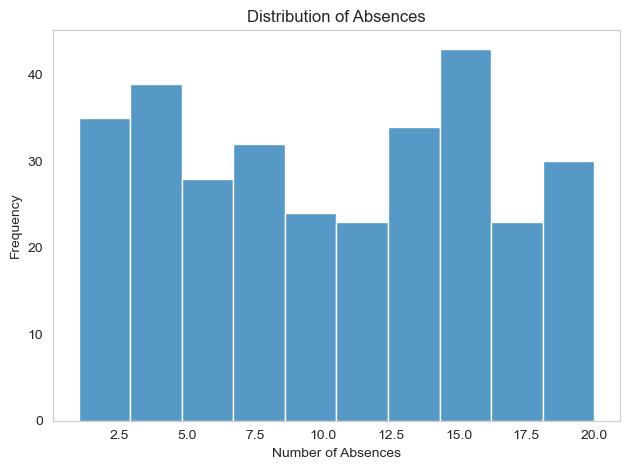

In [45]:
# Visualize the variable

plt.subplot(1, 1, 1)
sns.histplot(data = df, x="Absences", multiple="stack")
sns.set_style("whitegrid")
plt.xlabel('Number of Absences')
plt.ylabel('Frequency')
plt.title('Distribution of Absences')

plt.tight_layout()
plt.show()

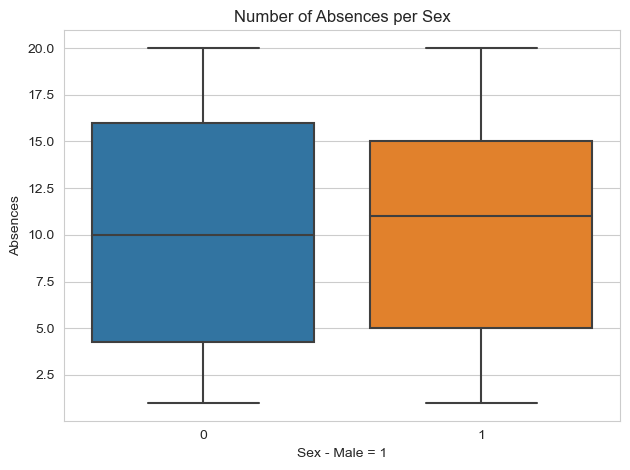

In [46]:
# Boxplot of target variable

plt.subplot(1, 1, 1)
sns.boxplot(x=df5["GenderID"], y=df5["Absences"])
#sns.set_style("whitegrid")
plt.xlabel('Sex - Male = 1')
plt.ylabel('Absences')
plt.title('Number of Absences per Sex')

plt.tight_layout()
plt.show()

In [47]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 310
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MarriedID             268 non-null    int64 
 1   GenderID              268 non-null    int64 
 2   Salary                268 non-null    int64 
 3   RaceDesc              268 non-null    object
 4   PerformanceScore      268 non-null    object
 5   EmpSatisfaction       268 non-null    int64 
 6   SpecialProjectsCount  268 non-null    int64 
 7   DaysLateLast30        268 non-null    int64 
 8   Absences              268 non-null    int64 
 9   Age                   268 non-null    int64 
 10  Days_Since_Review     268 non-null    int32 
 11  Days_Employed         268 non-null    int32 
dtypes: int32(2), int64(8), object(2)
memory usage: 25.1+ KB


## Step 3: Run Poisson Model

In [48]:
# Create and run model

from statsmodels.formula.api import glm
pmodel = glm('Absences ~ MarriedID + GenderID + Salary + C(RaceDesc) + C(PerformanceScore) + EmpSatisfaction + SpecialProjectsCount + DaysLateLast30 + Age + Days_Since_Review + Days_Employed', data=df5, family = sm.families.Poisson()).fit()
pmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Absences   No. Observations:                  268
Model:                            GLM   Df Residuals:                      250
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -993.80
Date:                Sun, 05 May 2024   Deviance:                       928.42
Time:                        15:23:17   Pearson chi2:                     839.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2179
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    1.5507      0.299      5.178      0.000       0.964       2.138
C(RaceDesc)[T.Asian]                         0.4835      0.229      2.110      0.035       0.034       0.932
C(RaceDesc)[T.Black or African American]     0.4817      0.224      2.152      0.031       0.043       0.920
C(RaceDesc)[T.Hispanic]                     -1.2184      0.742     -1.641      0.101      -2.673       0.236
C(RaceDesc)[T.Two or more races]             0.2794      0.243      1.149      0.251      -0.197       0.756
C(RaceDesc)[T.White]                         0.4276      0.221      1.931      0.053      -0.006       0.862
C(PerformanceScore)[T.Fully Meets]          -0.0433      0.064     -0.676      0.499      -0.169       0.082
C(PerformanceScore)[T.Needs Improvement]    -0.1731      0.184     -0.940      0.347      -0.534       0.188
C(PerformanceScore)[T.PIP]                  -0.5283      0.221     -2.387      0.017      -0.962      -0.094
MarriedID                                    0.0966      0.040      2.434      0.015       0.019       0.174
GenderID                                     0.0452      0.039      1.149      0.250      -0.032       0.122
Salary                                    2.749e-06   1.09e-06      2.523      0.012    6.14e-07    4.89e-06
EmpSatisfaction                              0.0347      0.023      1.511      0.131      -0.010       0.080
SpecialProjectsCount                        -0.0289      0.012     -2.476      0.013      -0.052      -0.006
DaysLateLast30                               0.0452      0.041      1.094      0.274      -0.036       0.126
Age                                         -0.0041      0.003     -1.496      0.135      -0.010       0.001
Days_Since_Review                         9.197e-05   3.84e-05      2.392      0.017    1.66e-05       0.000
Days_Employed                             3.989e-05   3.23e-05      1.237      0.216   -2.33e-05       0.000
============================================================================================================
"""

## Step 4: Synthesize


    I chose "Absences" as the target variable for this model. Hence, I chose to run a Poisson model. I chose 3 demographics-related variables and all the rest are job-performance related. The demographic variables are age, race, gender(m/f), and married (y/n). The performance related variables are Salary, Employee Satisfaction, Performance Score, Special Projects Count, DaysLateLast 30, Days since last performance review, and number of days employed.
    
    All of these variables are statistically significant at the 95% confidence level, including all the dummy_variables for race and performance score. This means that all of the variables included in the model are good at predicting the number of absences.
    

## Step 5: Insights

In [49]:
# Interpret

print(np.exp(-0.1731))
print(np.exp(0.0452))
print(np.exp(-0.0041))

0.8410535052886866
1.0462370864026507
0.995908393524931



    This model provided interesting insights about estimaitng the number of absences. For example:
    
    - Being a male results in 1.046 times more absences
    - Having a performance score of "Needs Improvement" results in 0.84 times more absences
    - Additional years of age increase result in 0.99 times more absences
    
    As the next steps I would suggest running other models with less categorical variables and perhaps more numerical variables such as years of exprience and number of children. These two variables could provide interesting insights about absences. 
    
    